# statistics

In [1]:
from __future__ import division
from collections import Counter
import math
import matplotlib.pylab as plt
from IPython.display import Image

from linear_algebra import sum_of_squares, dot

In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

<IPython.core.display.Javascript object>


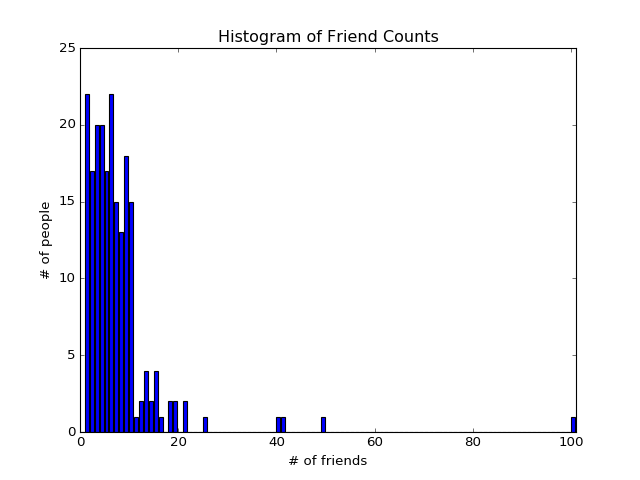

num_points 204
largest_value 100
smallest_value 1
smallest_value 1
second_smallest_value 1
second_largest_value 49


In [3]:
def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.axis([0,101,0,25])
    plt.bar(xs, ys)
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

% matplotlib notebook
make_friend_counts_histogram(plt)

num_points = len(num_friends)
print 'num_points', num_points

largest_value = max(num_friends)
print 'largest_value', largest_value

smallest_value = min(num_friends)
print 'smallest_value', smallest_value

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
print 'smallest_value', smallest_value

second_smallest_value = sorted_values[1]
print 'second_smallest_value', second_smallest_value

second_largest_value = sorted_values[-2]
print 'second_largest_value', second_largest_value

### mean

In [4]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

### median

In [5]:
def median(x):
    
    x_sorted = sorted(x)
    quotient, remainder = divmod(len(x_sorted), 2)
    
    if remainder==0:        
        return (x_sorted[quotient-1] + x_sorted[quotient]) / 2
    else:
        return x_sorted[quotient]

median(num_friends)

6.0

### quantile

In [6]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    x_sorted = sorted(num_friends)
    n = len(x_sorted)
    p_idx = int(n * p)
    return x_sorted[p_idx]

quantile(num_friends, 0.75)

9

### mode

In [7]:
def mode(x):
    """returns a list, might be more than one mode"""
    counter = Counter(num_friends)
    max_cnt = max(counter.itervalues())
    return [num for num, cnt in counter.iteritems() if cnt==max_cnt]

mode(num_friends)

[1, 6]

### range

In [8]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

### de_mean

In [17]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_mean = mean(x)
    return [val - x_mean for val in x]
    
de_mean(num_friends)[:10]

[92.66666666666667,
 41.666666666666664,
 33.666666666666664,
 32.666666666666664,
 17.666666666666668,
 13.666666666666668,
 13.666666666666668,
 11.666666666666668,
 11.666666666666668,
 10.666666666666668]

### variance
$ \sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n} $

In [10]:
def variance(x):
    """assumes x has at least two elements"""
    x_mean = mean(x)
    n = len(x)
    return sum([(val - x_mean)**2 for val in x]) / n
    
variance(num_friends)

81.14379084967331

### standard_deviation

In [11]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.007984838446017

### interquartile_range

In [12]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

In [13]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,
                 47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,
                 39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,
                 24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                 36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,
                 35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,
                 40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,
                 40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,
                 20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,
                 37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,
                 32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,
                 24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,
                 31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
                 22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### covariance

$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [14]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
    
covariance(num_friends, daily_minutes)

22.425435139573064

### correlation

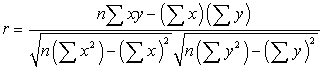

In [15]:
Image('img/C05_006.png')

#### correlation vs covariance

The problem with **covariances** is that they are hard to compare: when you calculate the covariance of a set of heights and weights, as expressed in (respectively) meters and kilograms, you will get a different covariance from when you do it in other units (which already gives a problem for people doing the same thing with or without the metric system!), but also, it will be hard to tell if (e.g.) height and weight 'covariate better' than, e.g. the length of your toes and fingers, simply because the 'scale' you calculate the covariance on is different.

The solution to this is to 'normalize' the covariance: you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be **between -1 and 1**: the correlation. Whatever unit your original variables were in, you will always get the same result, and this will also ensure that you can, to a certain degree, compare whether two variables 'correlate' more than two others, simply by comparing their correlation.

In [16]:
def correlation(x, y):
    x_st = standard_deviation(x)
    y_st = standard_deviation(y)
    
    if x_st > 0 and y_st > 0:
        return covariance(x, y) / (x_st * y_st)
    else:
        # if no variation, correlation is zero
        return 0
    
correlation(num_friends, daily_minutes)

0.24858814299318005